In [1]:
import pandas as pd

In [2]:
oakland_df = pd.read_csv('details_csv/oakland_details.csv')
oakland_df.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,4.69,4.73,4.59,4.84,4.86
1,4.96,4.96,4.97,4.97,4.98
2,4.90,4.87,4.83,4.94,4.94
3,4.80,4.80,5.00,5.00,5.00
4,4.96,4.92,5.00,5.00,5.00


# Data Cleaning
Refine the data to ensure its suitability for analysis.

## Handle Missing Values

In [3]:
oakland_df.shape

(3001, 5)

In [4]:
oakland_df.isnull().sum()

review_scores_rating           514
review_scores_accuracy         518
review_scores_cleanliness      518
review_scores_checkin          518
review_scores_communication    518
dtype: int64

In [5]:
percent_missing = oakland_df.isnull().sum() * 100 / len(oakland_df)
percent_missing

review_scores_rating           17.127624
review_scores_accuracy         17.260913
review_scores_cleanliness      17.260913
review_scores_checkin          17.260913
review_scores_communication    17.260913
dtype: float64

In [6]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the data and transform the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(oakland_df), columns=oakland_df.columns)

# Display the DataFrame with imputed values
print(df_imputed)

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     4.69                    4.73                       4.59   
1                     4.96                    4.96                       4.97   
2                     4.90                    4.87                       4.83   
3                     4.80                    4.80                       5.00   
4                     4.96                    4.92                       5.00   
...                    ...                     ...                        ...   
2996                  4.88                    4.92                       4.88   
2997                  4.88                    4.92                       4.88   
2998                  4.88                    4.92                       4.88   
2999                  4.88                    4.92                       4.88   
3000                  4.88                    4.92                       4.88   

      review_scores_checkin

In [7]:
df_imputed.isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
dtype: int64

## Check Data Types

In [8]:
oakland_df.dtypes

review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
dtype: object

## Remove Duplicate Entries

In [9]:
df_imputed.duplicated().sum()

1041

In [10]:
cleaned_df = df_imputed.drop_duplicates()
cleaned_df.duplicated().sum()

0

In [11]:
cleaned_df.shape

(1960, 5)

## Remove Outliers

In [12]:
cleaned_df.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,4.718383,4.779276,4.715092,4.864801,4.843332
std,0.402934,0.380019,0.392119,0.270608,0.352924
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.650000,4.750000,4.640000,4.860000,4.840000
50%,4.820000,4.890000,4.840000,4.940000,4.940000
75%,4.920000,4.950000,4.950000,4.990000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


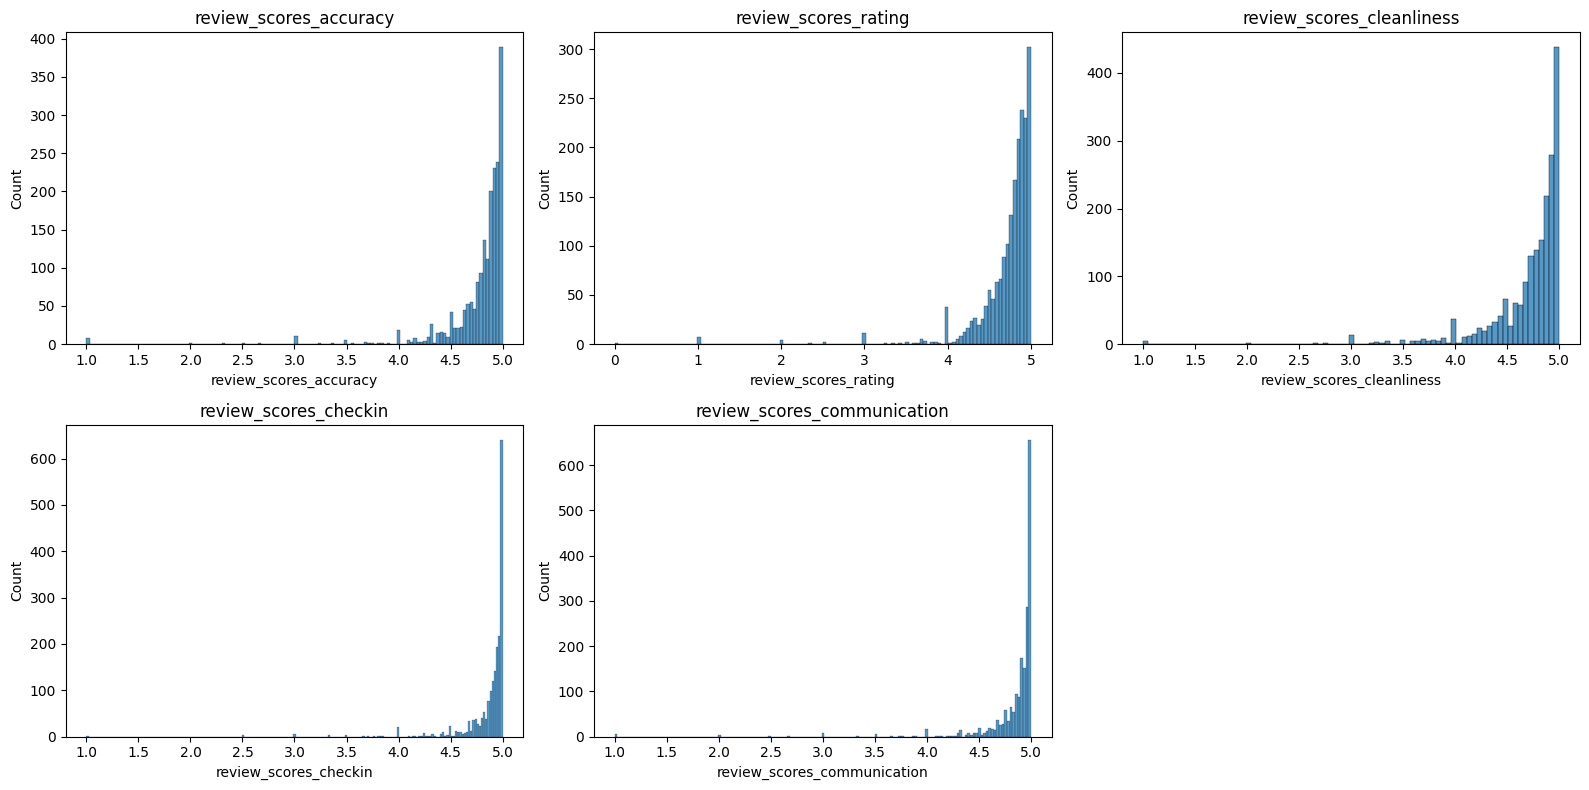

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_df is your DataFrame containing the data

# Create subplots for 5 graphs
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Plot histogram for each column
sns.histplot(cleaned_df['review_scores_accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('review_scores_accuracy')

sns.histplot(cleaned_df['review_scores_rating'], ax=axes[0, 1])
axes[0, 1].set_title('review_scores_rating')

sns.histplot(cleaned_df['review_scores_cleanliness'], ax=axes[0, 2])
axes[0, 2].set_title('review_scores_cleanliness')

sns.histplot(cleaned_df['review_scores_checkin'], ax=axes[1, 0])
axes[1, 0].set_title('review_scores_checkin')

sns.histplot(cleaned_df['review_scores_communication'], ax=axes[1, 1])
axes[1, 1].set_title('review_scores_communication')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

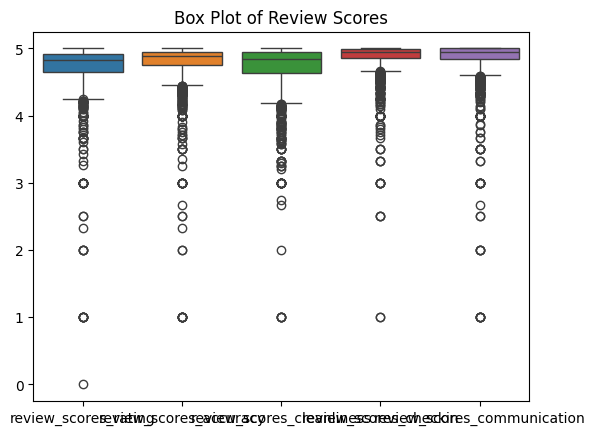

In [14]:
# Box Plots
sns.boxplot(cleaned_df)
plt.title('Box Plot of Review Scores')
plt.show()

In [15]:
cleaned_df.shape

(1960, 5)

In [16]:
import pandas as pd

# Assuming df is your DataFrame containing the review scores

# Define a function to remove outliers based on a stringent criteria using IQR
def remove_outliers_strict(cleaned_df):
    Q1 = cleaned_df.quantile(0.25)
    Q3 = cleaned_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_df[((cleaned_df >= lower_bound) & (cleaned_df <= upper_bound)).all(axis=1)]

# Remove outliers using stringent criteria
cleaned_df_strict = remove_outliers_strict(cleaned_df)

# Display the cleaned DataFrame
print("DataFrame without outliers (stringent criteria):")
print(cleaned_df_strict)

DataFrame without outliers (stringent criteria):
      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                     4.69                    4.73                       4.59   
1                     4.96                    4.96                       4.97   
2                     4.90                    4.87                       4.83   
3                     4.80                    4.80                       5.00   
4                     4.96                    4.92                       5.00   
...                    ...                     ...                        ...   
2778                  4.83                    5.00                       4.50   
2783                  4.67                    5.00                       4.83   
2818                  4.89                    4.78                       4.67   
2828                  5.00                    5.00                       5.00   
2886                  5.00                    5.00          

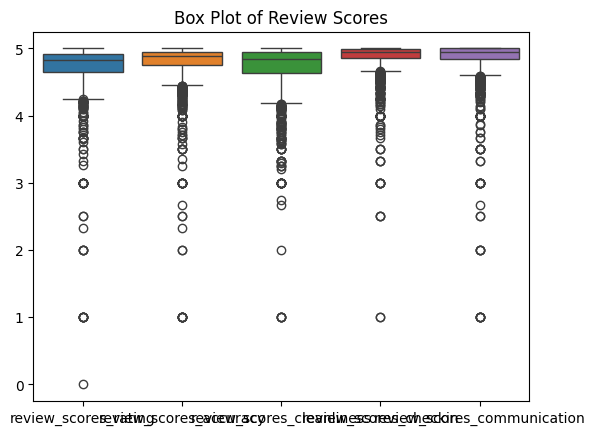

In [17]:
# Box Plots
sns.boxplot(cleaned_df)
plt.title('Box Plot of Review Scores')
plt.show()

# Data Visualisation
Illustrate your insights for clearer comprehension.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

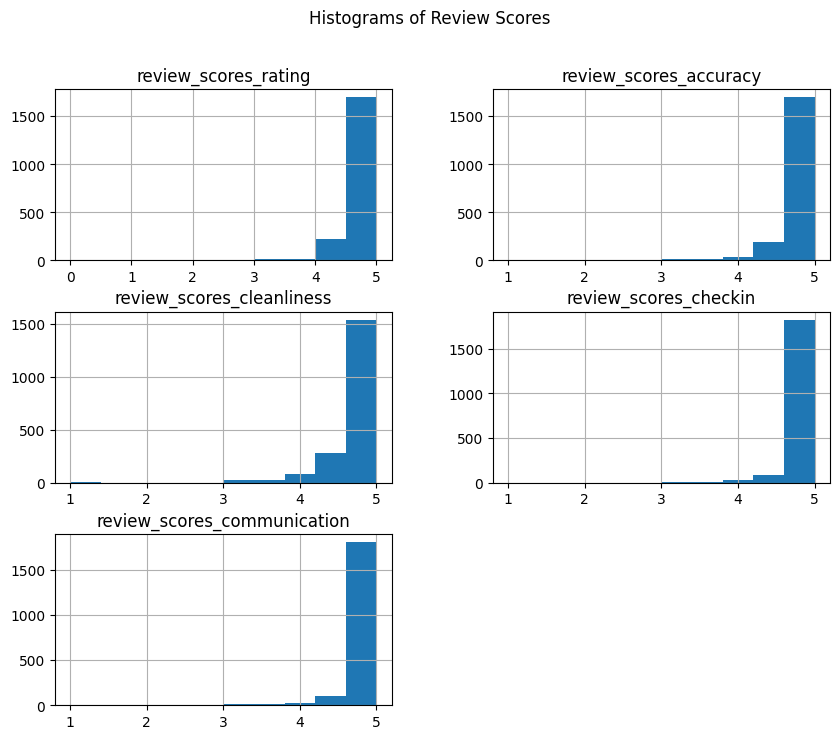

In [19]:
# Histograms
cleaned_df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Review Scores')
plt.show()

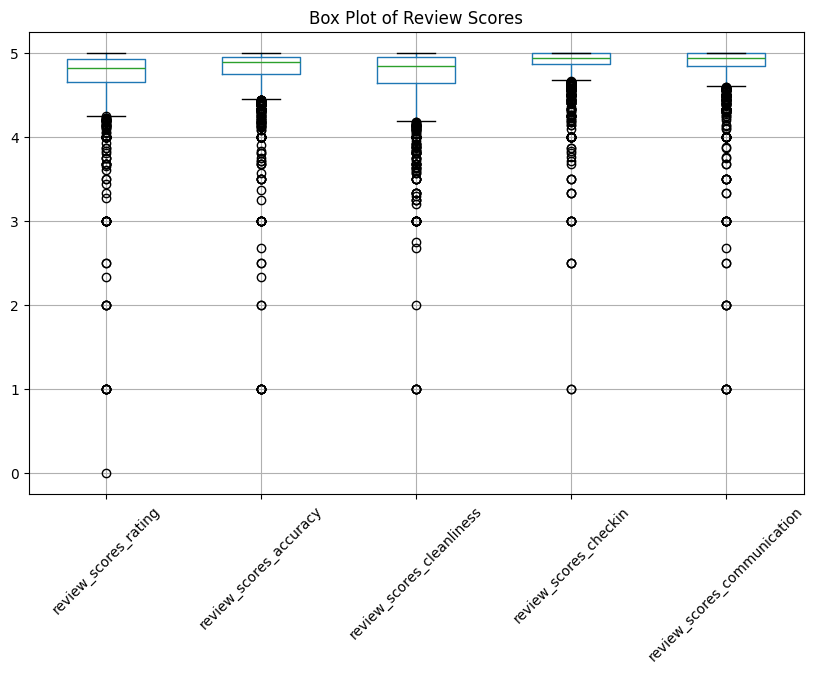

In [20]:
# Box Plots
cleaned_df.boxplot(figsize=(10, 6))
plt.title('Box Plot of Review Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

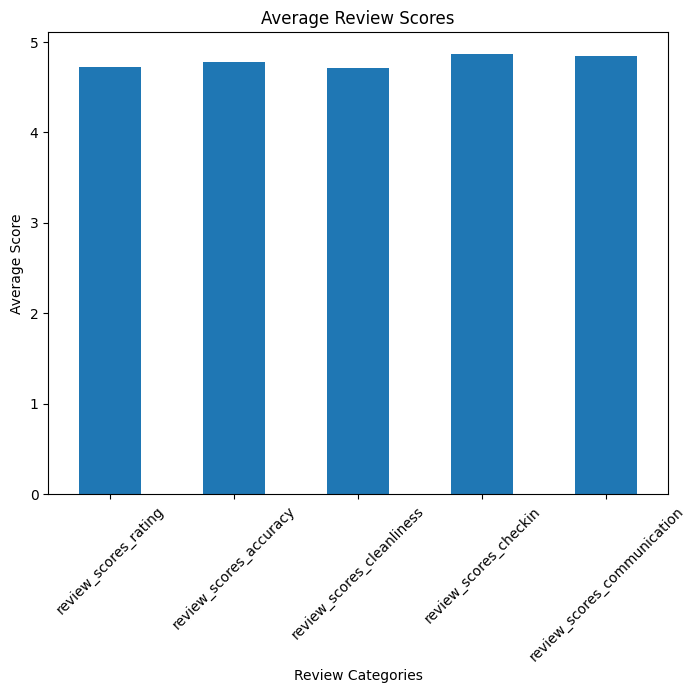

In [21]:
# Bar Plots (average review scores)
avg_scores = cleaned_df.mean()
avg_scores.plot(kind='bar', figsize=(8, 6))
plt.title('Average Review Scores')
plt.xlabel('Review Categories')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

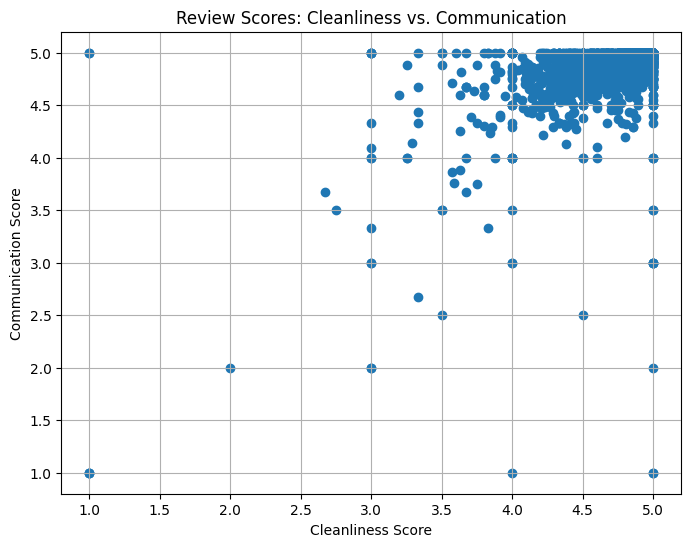

In [22]:
# Scatter Plot (example: review_scores_cleanliness vs. review_scores_communication)
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['review_scores_cleanliness'], cleaned_df['review_scores_communication'])
plt.title('Review Scores: Cleanliness vs. Communication')
plt.xlabel('Cleanliness Score')
plt.ylabel('Communication Score')
plt.grid(True)
plt.show()

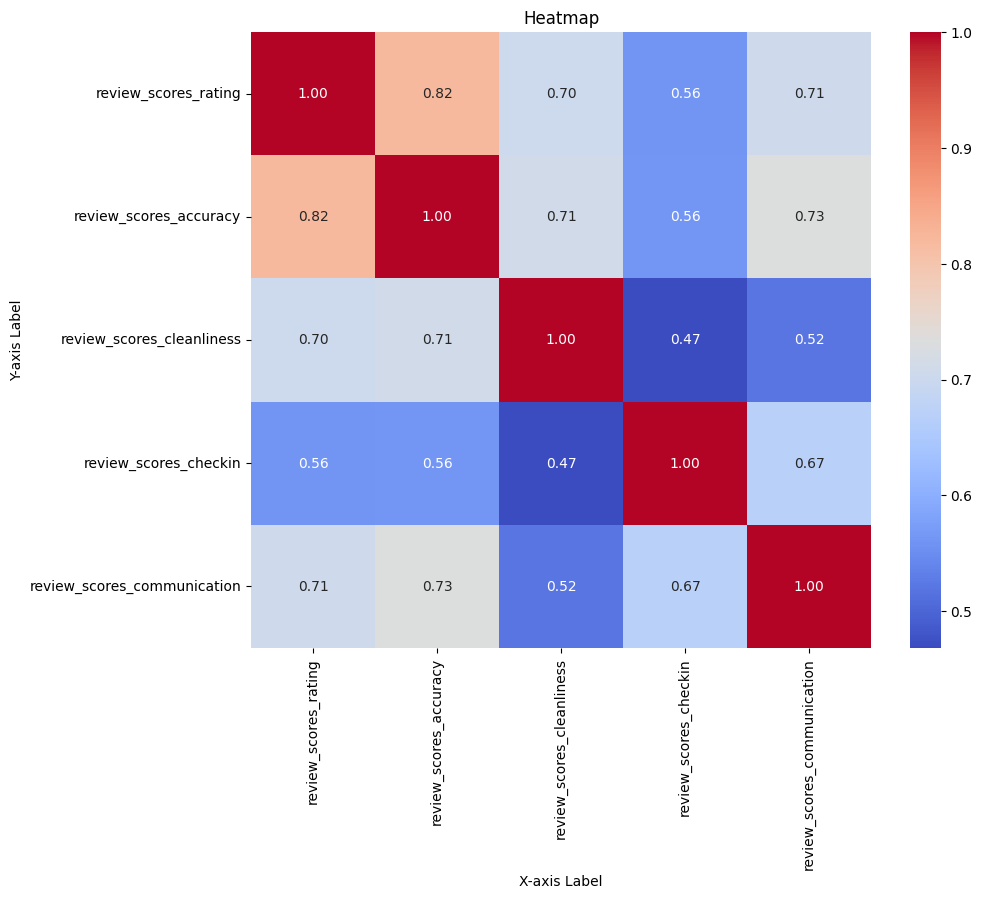

In [23]:
import seaborn as sns
# Heatmap (correlation matrix)
# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(cleaned_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")  # Create heatmap
plt.title('Heatmap')  # Add title to the plot
plt.xlabel('X-axis Label')  # Add label to the x-axis
plt.ylabel('Y-axis Label')  # Add label to the y-axis
plt.show()  # Display the plot

# Modelling
Use the tools at your disposal, be it regression analysis, clustering, or any other method, to uncover deeper insights.

In the provided dataset, the dependent variable or target variable is likely to be review_scores_rating. This variable represents the overall rating given by guests for their experience with a particular listing. It serves as a summary or composite score of various aspects such as accuracy, cleanliness, check-in experience, communication, and overall satisfaction.

In [25]:
cleaned_df.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,4.69,4.73,4.59,4.84,4.86
1,4.96,4.96,4.97,4.97,4.98
2,4.90,4.87,4.83,4.94,4.94
3,4.80,4.80,5.00,5.00,5.00
4,4.96,4.92,5.00,5.00,5.00


In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = cleaned_df.drop(columns=['review_scores_rating'])
y = cleaned_df['review_scores_rating']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predict on the testing data
y_pred = svr.predict(X_test)

### Metrics

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.04383154640773001
Root Mean Squared Error: 0.2093598490822202
Mean Absolute Error: 0.10632117312417928
R-squared (R2) Score: 0.6298412146693892


### Feature Scaling using StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tuning using GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best SVR model
best_svr = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}


In [34]:
best_svr

SVR(C=0.1, kernel='linear')

### Cross-validation for evaluation

In [35]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Cross-validation RMSE scores: [0.21187333 0.15451186 0.21428937 0.31010636 0.19254619]
Mean RMSE: 0.2166654242020276


### Error Analysis

In [36]:
# Fit the model on the entire training set
best_svr.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = best_svr.predict(X_test_scaled)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 0.17384087567286313


### Improved R2 score

In [37]:
# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7447856616306993


# Presentation
This is your executive summary. Distill key insights and actionable recommendations

In [ ]:
# Calculate the overall review score for each property
oakland_df['overall_review_score'] = oakland_df.mean(axis=1)

In [ ]:
oakland_df.head()
oakland_df.isnull().sum()
oakland_df.shape

In [ ]:
# Sort properties based on their overall review scores in descending order
sorted_df = oakland_df.sort_values(by='overall_review_score', ascending=False)
sorted_df